# Лабораторная работа №1
# Выполнила Кириленко Юлия, 18 МАГ ИАД 

## Задача: 
необходимо определить, будут ли продажи игры в Европе больше продаж в других странах мира (кроме Северной Америки и Японии). 

## Атрибуты
1. Name - название игры
2. Platform - платформа, на которой работает игра
3. Year_of_Release - год выхода 
4. Genre - жанр
5. Publisher - издатель
6. NA_Sales - продажи игры в Северной Америке (в миллионах единиц)
7. EU_Sales - продажи игры в Европе (в миллионах единиц)
8. JP_Sales - продажи игры в Японии (в миллионах единиц)
9. Other_Sales - продажи игры в остальном мире, то есть в Африке, Азии (за исключением Японии), Австралии и Южной Америке (в миллионах единиц)
10. Global_Sales - продажи игры в мире
11. Critic_Score - общий балл, поставленный критиками Metacritic
12. Critic_Count - количество критиков, участвовавших при создании Critic_score
13. User_Score - общий балл, поставленный пользователями Metacritic
15. User_Count - количество пользователей, которые дали user_score
16. Developer - разработчик
17. Rating - ESRB рейтинг (например, все, подросток, только для взрослых .. и т.д.)

В наборе данные есть пропущенные значения

Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Читаем датасет

In [2]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv/Video_Games_Sales_as_at_22_Dec_2016.csv', engine = 'python')

Узнаем тип данных и выводим первые и последние 5 записей

In [3]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Выводим размерность и названия столбцов

In [18]:
print(data.shape)
print(data.columns)

(16719, 14)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'],
      dtype='object')


Определяем количество записей и выводим значения атрибута Genre

In [10]:
data.index

RangeIndex(start=0, stop=16719, step=1)

In [15]:
data.at[2, 'Genre']

'Racing'

In [16]:
data['Genre']

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
5              Puzzle
6            Platform
7                Misc
8            Platform
9             Shooter
10         Simulation
11             Racing
12       Role-Playing
13             Sports
14               Misc
15             Sports
16             Action
17             Action
18           Platform
19               Misc
20       Role-Playing
21           Platform
22           Platform
23             Action
24             Action
25       Role-Playing
26             Puzzle
27       Role-Playing
28             Racing
29            Shooter
             ...     
16689      Simulation
16690          Racing
16691       Adventure
16692          Sports
16693       Adventure
16694      Simulation
16695          Action
16696          Action
16697          Sports
16698          Action
16699          Action
16700         Shooter
16701          Puzzle
16702          Puzzle
16703     

In [17]:
data['Genre'][3]

'Sports'

Определяем типы различных атрибутов и выводим первые 5 значений

In [18]:
data['NA_Sales'].dtype.name

'float64'

In [19]:
type(data['Genre'][3])

str

In [20]:
type(data['Genre'])

pandas.core.series.Series

In [21]:
data[['Genre', 'Publisher']].head()

,Genre,Publisher
0,Sports,Nintendo
1,Platform,Nintendo
2,Racing,Nintendo
3,Sports,Nintendo
4,Role-Playing,Nintendo


Выводим описательную статистику по числовым атрибутам

In [22]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Строим диаграмму рассеяния и выводим матрицу корреляции атрибутов

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


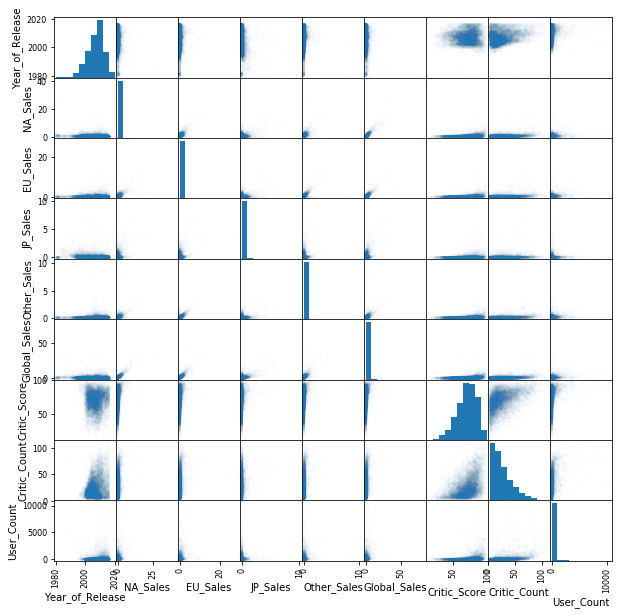

In [23]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [24]:
data.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


Анализируя матрицу корреляций, можно сделать вывод, что некоторые наборы признаков (NA_Sales, EU_Sales, Other_Sales и Global_Sales) сильно коррелированны. В дальнейшем необходимо будет удалить некоторые из них.

Строим различные графики зависмости года выпуска и количества продаж в Японии, количества продаж в Северной Америке, во всех странах мира.

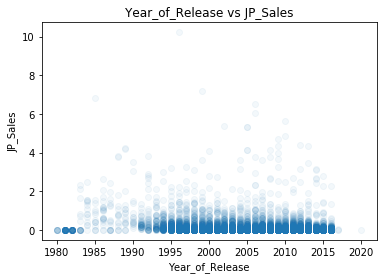

In [27]:
plt.plot(data['Year_of_Release'], data['JP_Sales'], 'o', alpha = 0.05)
plt.xlabel('Year_of_Release')
plt.ylabel('JP_Sales')
plt.title('Year_of_Release vs JP_Sales')
pass

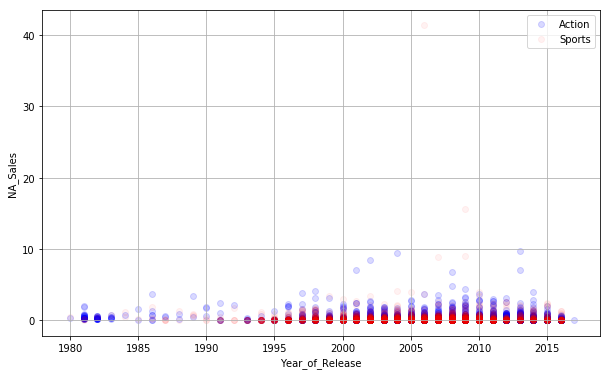

In [33]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Genre'] == 'Action']['Year_of_Release'],
            data[data['Genre'] == 'Action']['NA_Sales'],
            alpha = 0.15,
            label = 'Action',
            color = 'b')

plt.scatter(data[data['Genre'] == 'Sports']['Year_of_Release'],
            data[data['Genre'] == 'Sports']['NA_Sales'],
            alpha = 0.05,
            label = 'Sports',
            color = 'r')

plt.xlabel('Year_of_Release')
plt.ylabel('NA_Sales')
plt.legend()
plt.grid()

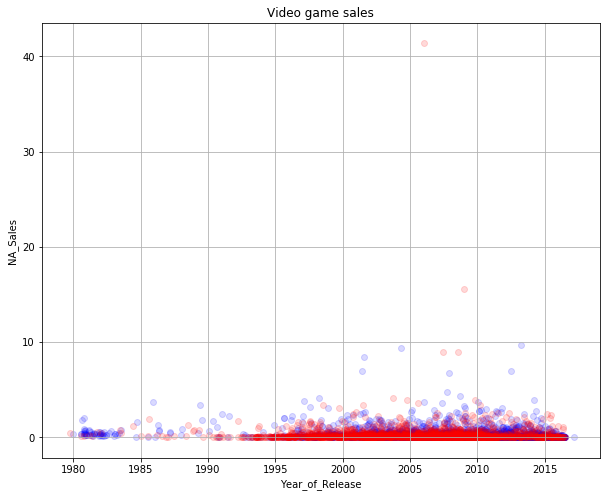

In [35]:
np.random.seed(0)
education_num_rnd = data['Year_of_Release'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['Genre'] == 'Action'],
            data[data['Genre'] == 'Action']['NA_Sales'],
            alpha = 0.15,
            label = 'Action',
            color = 'b')

plt.scatter(education_num_rnd[data['Genre'] == 'Sports'],
            data[data['Genre'] == 'Sports']['NA_Sales'],
            alpha = 0.15,
            label = 'Sports',
            color = 'r')

plt.xlabel('Year_of_Release')
plt.ylabel('NA_Sales')
plt.title('Video game sales')
plt.grid()

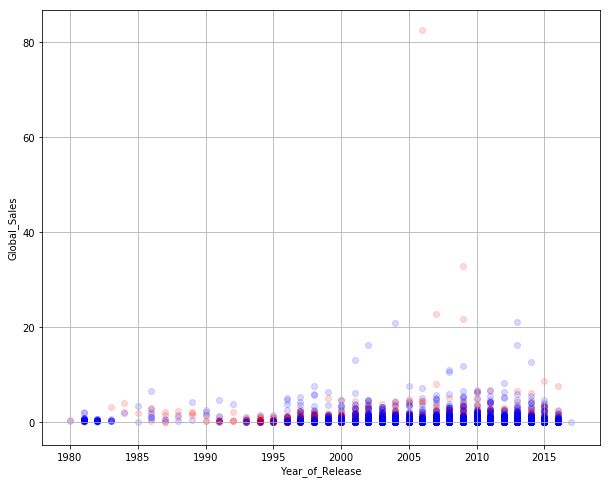

In [36]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Genre'] == 'Sports']['Year_of_Release'],
            data[data['Genre'] == 'Sports']['Global_Sales'],
            alpha = 0.15,
            label = 'Sports',
            color = 'r')

plt.scatter(data[data['Genre'] == 'Action']['Year_of_Release'],
            data[data['Genre'] == 'Action']['Global_Sales'],
            alpha = 0.15,
            label = 'Action',
            color = 'b')

plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.grid()

In [11]:
data.describe(include = ['object'])

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


Выводим описательную статистику по всем атрибутам

In [38]:
data.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


Узнаём все возможные значения, которые принимают атрибуты Platform, Genre, Publisher.

In [39]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [40]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [42]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


# Подготовка данных

Необходимо определить, будут ли продажи игры в Европе больше продаж в других странах мира (кроме Северной Америки и Японии). Для этого создадим столбец с бинарным признаком: 0 - если продаж в Европе меньше, 1 - если больше. Запишем его в столбец со значениями продаж в других странах мира (Other_Sales), а столбец со зачениями продаж в Европе удалим, чтобы задача не была слишком простой.

In [3]:
data.at[data['EU_Sales'] >= data['Other_Sales'], 'Other_Sales'] = 1
data.at[data['EU_Sales'] < data['Other_Sales'], 'Other_Sales'] = 0

In [4]:
data['Other_Sales'] = data['Other_Sales'].astype(np.int64)

In [5]:
data['Other_Sales'].dtype.name

'int64'

In [6]:
data = data.drop('EU_Sales',   axis = 1)

Удалим атрибут Global_Sales, так как он сильно коррелированный.

In [7]:
data = data.drop('Global_Sales',   axis = 1)

В столбце издателей оставим только двух основных, остальных запишем в 'other'.

In [8]:
import operator

In [9]:
data.at[operator.and_(data['Publisher'] != 'Electronic Arts' , data['Publisher'] != 'Activision'), 'Publisher'] = 'other'


Атрибуты Name, Developer должны быть удалены, так как имеют много уникальных значений и не будут полезны.

In [10]:
data = data.drop('Name',   axis = 1)\
           .drop('Developer',   axis = 1)

Удаляем строки с пропущенными значениями

In [11]:
data = data.dropna(axis = 0)

Признак User_Score в наших данных имеет тип object, а должен быть представлен в типе float64. Перед изменениями удалим строки с пропущенными значениями (tbd). Проверим, что тип был изменен.

In [12]:
data = data.drop(data[data['User_Score'] =='tbd'].index)

In [13]:
data['User_Score'] = pd.to_numeric(data['User_Score'])

In [14]:
data['User_Score'].dtype.name

'float64'

Изменим тип параметра Year_of_Release на object

In [15]:
data['Year_of_Release'] = data['Year_of_Release'].astype(int).astype(str)

In [16]:
data['Year_of_Release'].dtype.name

'object'

Выделяем из данных категориальные и количественные признаки

In [20]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating']
['NA_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [21]:
for c in categorical_columns:
    print(c, data[c].unique())

Platform ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']
Year_of_Release ['2006' '2008' '2009' '2005' '2007' '2010' '2013' '2004' '2002' '2001'
 '2011' '2012' '2014' '1997' '1999' '2015' '2016' '2003' '1998' '1996'
 '2000' '1994' '1985' '1992' '1988']
Genre ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']
Publisher ['other' 'Activision' 'Electronic Arts']
Rating ['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


# Векторизация

Проводим векторизацию для категориальных признаков (заменяем их на эквивалентные количественные). Отдельно обрабатываем бинарные и небинарные признаки.

In [22]:
data_describe = data.describe(include = [object])

In [23]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating']


Бинарных признаков нет. Проводим векторизацию для признаков Platform, Genre и Rating.


In [24]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA',
       'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne', 'Year_of_Release_1985', 'Year_of_Release_1988',
       'Year_of_Release_1992', 'Year_of_Release_1994', 'Year_of_Release_1996',
       'Year_of_Release_1997', 'Year_of_Release_1998', 'Year_of_Release_1999',
       'Year_of_Release_2000', 'Year_of_Release_2001', 'Year_of_Release_2002',
       'Year_of_Release_2003', 'Year_of_Release_2004', 'Year_of_Release_2005',
       'Year_of_Release_2006', 'Year_of_Release_2007', 'Year_of_Release_2008',
       'Year_of_Release_2009', 'Year_of_Release_2010', 'Year_of_Release_2011',
       'Year_of_Release_2012', 'Year_of_Release_2013', 'Year_of_Release_2014',
       'Year_of_Release_2015', 'Year_of_Release_2016', 'Genre_Action',
       'Genre_Adventure'

# Нормализация количественных признаков

Нормализуем количественные признаки (исключаем столбец Other_Sales)

In [25]:
data_numerical = data[numerical_columns]
data_numerical = data_numerical.drop('Other_Sales',   axis = 1)
data_numerical.describe()

,NA_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,0.394435,0.064149,70.268679,28.931146,7.185013,174.748022
std,0.967323,0.287550,13.870417,19.222757,1.440727,587.389332
min,0.000000,0.000000,13.000000,3.000000,0.500000,4.000000
25%,0.060000,0.000000,62.000000,14.000000,6.500000,11.000000
50%,0.150000,0.000000,72.000000,25.000000,7.500000,27.000000
75%,0.390000,0.010000,80.000000,39.000000,8.200000,89.000000
max,41.360000,6.500000,98.000000,113.000000,9.600000,10665.000000


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [27]:
data_numerical.describe()

,NA_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03
mean,-2.004406e-14,-1.239450e-14,7.140657e-16,-3.199902e-16,-2.375561e-14,-5.686925e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.077589e-01,-2.230880e-01,-4.128836e+00,-1.348982e+00,-4.640027e+00,-2.906897e-01
25%,-3.457320e-01,-2.230880e-01,-5.961377e-01,-7.767432e-01,-4.754635e-01,-2.787726e-01
50%,-2.526917e-01,-2.230880e-01,1.248212e-01,-2.045048e-01,2.186304e-01,-2.515334e-01
75%,-4.584317e-03,-1.883114e-01,7.015883e-01,5.237987e-01,7.044962e-01,-1.459816e-01
max,4.234942e+01,2.238171e+01,1.999314e+00,4.373403e+00,1.676228e+00,1.785911e+01


# Соединение в одну таблицу

In [28]:
data_binary = data['Other_Sales']
data = pd.concat((data_numerical, data_nonbinary, data_binary), axis = 1)
print(data.shape)

(6826, 71)


In [29]:
data.describe()

,NA_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Publisher_Electronic Arts,Publisher_other,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Other_Sales
count,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03,6.826000e+03,6826.000000,6826.000000,6826.000000,6826.000000,...,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,-2.004406e-14,-1.239450e-14,7.140657e-16,-3.199902e-16,-2.375561e-14,-5.686925e-17,0.022707,0.002051,0.067975,0.034720,...,0.138295,0.789628,0.000146,0.305010,0.136244,0.000146,0.209933,0.000146,0.348374,0.049663
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.148980,0.045245,0.251722,0.183084,...,0.345234,0.407603,0.012104,0.460446,0.343072,0.012104,0.407290,0.012104,0.476490,0.217264
min,-4.077589e-01,-2.230880e-01,-4.128836e+00,-1.348982e+00,-4.640027e+00,-2.906897e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.457320e-01,-2.230880e-01,-5.961377e-01,-7.767432e-01,-4.754635e-01,-2.787726e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.526917e-01,-2.230880e-01,1.248212e-01,-2.045048e-01,2.186304e-01,-2.515334e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-4.584317e-03,-1.883114e-01,7.015883e-01,5.237987e-01,7.044962e-01,-1.459816e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.234942e+01,2.238171e+01,1.999314e+00,4.373403e+00,1.676228e+00,1.785911e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

Выделяем X и Y, отделяя столбец Other_Sales

In [30]:
X = data.drop(('Other_Sales'), axis = 1) 
y = data['Other_Sales']
feature_names = X.columns

In [31]:
type(feature_names)

pandas.core.indexes.base.Index

In [32]:
feature_names

Index(['NA_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Year_of_Release_1985',
       'Year_of_Release_1988', 'Year_of_Release_1992', 'Year_of_Release_1994',
       'Year_of_Release_1996', 'Year_of_Release_1997', 'Year_of_Release_1998',
       'Year_of_Release_1999', 'Year_of_Release_2000', 'Year_of_Release_2001',
       'Year_of_Release_2002', 'Year_of_Release_2003', 'Year_of_Release_2004',
       'Year_of_Release_2005', 'Year_of_Release_2006', 'Year_of_Release_2007',
       'Year_of_Release_2008', 'Year_of_Release_2009', 'Year_of_Release_2010',
       'Year_of_Release_2011', 'Year_of_Release_2012', 'Year_of_Release_2013',
       'Year_of_Release_2014

In [33]:
print(X.shape)
print(y.shape)
N, d = X.shape

(6826, 70)
(6826,)


In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
type(y)

pandas.core.series.Series

Разделяем на обучающую (70%) и тестовую (30%) выборки. 

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4778 2048


In [38]:
4778 + 2048

6826

# kNN

Тренируем классификатор методом k ближайших соседей. Пусть количество соседей равно 10.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

Посчитаем значения ошибок на тренировочной и тестовой выборке.

In [77]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0301381331100879 0.0439453125


In [78]:
err_test = 1 - knn.score(X_test, y_test)

In [79]:
err_test

0.0439453125

Выводим матрицу несоответствий

In [80]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1919    6]
 [  84   39]]


В 6 случаях не было угадано, что продаж будет меньше. В 84 случаях не было угадано, что продаж будет больше. 

# Подбор параметров

Подбираем оптимальное количество соседей

In [81]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.028254499790707377 3


Оптимальное количество соседей равно 3. Также представлена ошибка на тренировочной выборке.

In [82]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.018627040602762664 0.03857421875


Результат на тренировочной выборке значительно улучшился, а на тестовой улучшился незначительно.

# SVC

Строим классификатор с помощью машины опорных векторов, выводим ошибки на тестовой и обучающей выборках, а также матрицу несоответствий.

In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.02678945165341147 0.0419921875


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Подбор параметров

In [147]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.028673084972791973 100.0


In [148]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.018627040602762664 0.03857421875


На обучающей и тестовой выборках данный классификатор работает также, как и kNN.

# Random Forest

Строим классификатор Random Forest. Выводим ошибки на тестовой и обучающей выборках.

In [245]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.03466796875


Данный классификатор работает на выборках лучше, чем предыдущие.

# Значимость признаков

In [246]:
np.sum(rf.feature_importances_)

1.0000000000000004

In [247]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'NA_Sales' (0.301861)
 2. feature 'JP_Sales' (0.128211)
 3. feature 'User_Count' (0.109241)
 4. feature 'Critic_Count' (0.079254)
 5. feature 'Critic_Score' (0.072244)
 6. feature 'User_Score' (0.050664)
 7. feature 'Rating_E' (0.013026)
 8. feature 'Genre_Sports' (0.010831)
 9. feature 'Publisher_Electronic Arts' (0.010701)
10. feature 'Platform_PS2' (0.010381)
11. feature 'Publisher_other' (0.010195)
12. feature 'Rating_T' (0.009784)
13. feature 'Genre_Action' (0.008766)
14. feature 'Platform_X360' (0.007871)
15. feature 'Rating_M' (0.007600)
16. feature 'Platform_PC' (0.007501)
17. feature 'Genre_Shooter' (0.007451)
18. feature 'Platform_PS4' (0.007284)
19. feature 'Year_of_Release_2007' (0.007140)
20. feature 'Genre_Racing' (0.006276)
21. feature 'Platform_Wii' (0.006081)
22. feature 'Genre_Role-Playing' (0.006077)
23. feature 'Publisher_Activision' (0.005841)
24. feature 'Genre_Misc' (0.005827)
25. feature 'Platform_PS3' (0.005748)
26. feature 'Year_of

In [248]:
feature_names[[1,0,1]]

Index(['JP_Sales', 'NA_Sales', 'JP_Sales'], dtype='object')

(-1, 20)

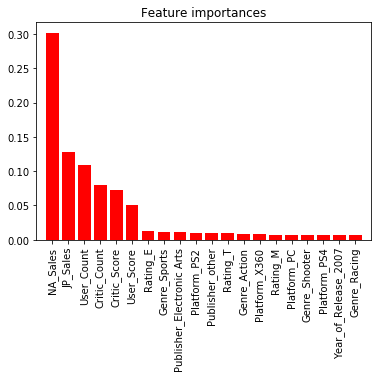

In [249]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Сильно выделяется признак NA_Sales, так как имеет самый высокий показатель.

Удалим все признаки с малым значение feature importance:

In [250]:
for f in range(d):
    if importances[indices[f]] < 0.005:
        X_train = X_train.drop(feature_names[indices[f]],   axis = 1)
        X_test = X_test.drop(feature_names[indices[f]],   axis = 1)


Проверим, как изменлись ошибки на обучающей и тестовой выборках.

In [251]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.03662109375


# Extremely Randomized Trees

Построим классификатор Extremely Randomized Trees. Выведем ошибки на тестовой и обучающей выборках.

In [88]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.037109375


Немного хуже классификатора Random Forest на тестовой выборке.

# AdaBoost

Тренируем классификатор с помощью алгоритма Adaptive Boosting, выводим ошибки на тестовой и обучающей выборках.

In [89]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.01297614064462118 0.04248046875


# GBT

Тренируем классификатор с помощью алгоритма Gradient Boosting, выводим ошибки на тестовой и обучающей выборках.

In [90]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.026580159062369192 0.04052734375


# Вывод
Лучше всех на обучающей и тестовой выборках работает классификатор Random Forest.

# Лабораторная работа №2. Обучение нейронной сети

### Обучаем классификатор

In [91]:
from sklearn.neural_network import MLPClassifier

Возьмём 1 скрытый слой со 100 скрытыми единицами:

In [92]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Проверяем качество классификатора 

In [93]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [94]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.041015625


###  Подбор гиперпараметров

Подберем оптимальное значение количества нейронов

In [95]:
neurons_arr = np.arange(10,200,10)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

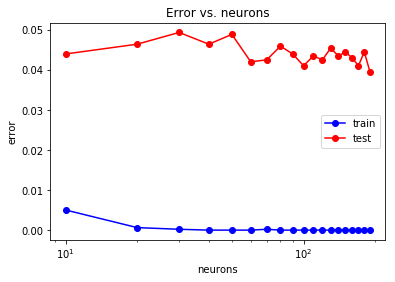

In [96]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [97]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03955078125


Оптимальное значение количества нейронов:

In [98]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)

[190]


In [99]:
neurons_opt = neurons_opt[0]
print(neurons_opt)

190


Подберем оптимальное значение параметра регуляризации alpha

In [100]:
alpha_arr = np.logspace(-3, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neurons_opt,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

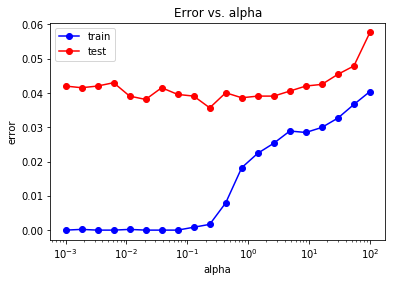

In [101]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [102]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03564453125


Оптимальное значение alpha:

In [103]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.23357215]


In [104]:
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.23357214690901212


Подберём оптимальные значения alpha и количества нейронов

In [105]:
alpha_arr = np.logspace(-3, 2, 20)
neurons_arr = np.arange(10,200,10)
test_err = []
train_err = []
for neurons in neurons_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neurons,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))

Минимальное значение ошибки:

In [106]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03369140625


Оптимальное значение alpha:

In [107]:
alpha_opt = alpha_arr[(test_err.index(min_test_err))%alpha_arr.size]
print(alpha_opt)

0.12742749857031335


Оптимальное значение количества нейронов:

In [108]:
neurons_opt = neurons_arr[(test_err.index(min_test_err))//neurons_arr.size]
print(neurons_opt)

160


### Классификатор при найденных оптимальных значениях alpha и количества нейронов: 

Повторим обучение и определим ошибки на обучающей и тестовой выборках:

In [110]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0006278777731268313
0.0380859375


### Матрица рассогласования:

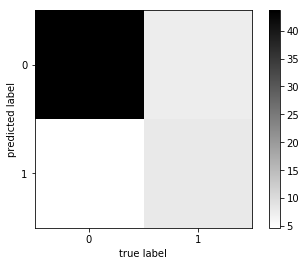

In [112]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [113]:
print(confusion_matrix(y_test, y_test_pred))

[[1903   22]
 [  56   67]]


### Другие метрики качества:

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1925
           1       0.75      0.54      0.63       123

   micro avg       0.96      0.96      0.96      2048
   macro avg       0.86      0.77      0.81      2048
weighted avg       0.96      0.96      0.96      2048



### Нейронная сеть с 2 скрытыми слоями

Подберём для нейронной сети с двумя срытыми слоями оптимальное количество нейронов на скрытых слоях

In [115]:
hid_arr = [(x, y) for x in range(10, 100, 10) for y in range(10, 100, 10)]
test_err = []
train_err = []
for h in hid_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = h, alpha = alpha_opt,
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Минимальное значение ошибки:

In [116]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03466796875


Оптимальное количество нейронов:

In [117]:
neur_opt = [hid_arr[i] for i in range(0, len(hid_arr)) if test_err[i] == min_test_err]
neur_opt

[(50, 40), (60, 50)]

In [118]:
n_opt = neur_opt[0]
n_opt

(50, 40)

Подберём оптимальное значение параметра alpha:

In [119]:
alpha_arr = np.logspace(-3, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n_opt, alpha = alpha,
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Минимальное значение ошибки:

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03466796875


Оптимальное значение параметра alpha:

In [121]:
alpha_opt_new = alpha_arr[test_err == min_test_err]
print(alpha_opt_new)

[0.1274275]


## Выводы: 

С помощью MLP удалось снизить ошибку c 0.03662109375 до 0.03369140625 на тестовой выборке. Это удалось при значениях alpha=0.12742749857031335 и количестве нейронов 160. Нейронная сеть снова показала высокую ошибку 2-го рода. Тем не менее, данный показатель при нейронной сети оказался лучше (в 2 раза меньше), чем при классификаторах, использовавшихся ранее. При уменьшении параметра alpha ошибки на тестовой и обучающей выборках уменьшаются. Ошибка уменьшается при увеличении количества нейронов в скрытом слое. На графике это заметно, но не значительно. Это может быть из-за того, что было взято небольшое количество нейронов (от 10 до 200 с шагом 10) и из-за несбалансированности датасета.

# Лабораторная работа №3. 

## Random Forests 

Подберём оптимальное количество деревьев для Random Forests.

In [122]:
from sklearn import ensemble


In [123]:
trees_arr = np.arange(10,200,10)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score = True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    oob_error = 1 - rf.oob_score_
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(oob_error)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Построим график зависимости ошибки на обучающей и тестовой выборке и oob-ошибки от количества используемых деревьев.

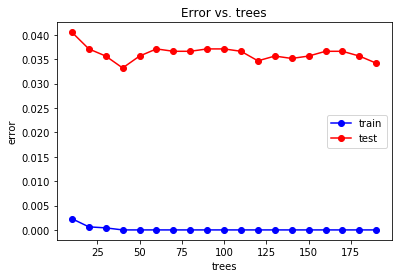

In [124]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
#plt.plot(trees_arr, oob_err, 'g-o', label = 'oob err')
plt.title('Error vs. trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

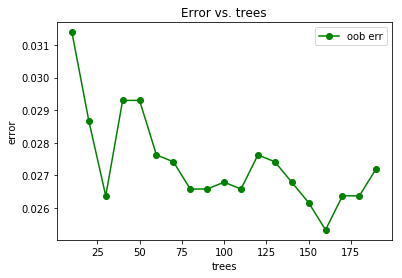

In [125]:
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob err')
plt.title('Error vs. trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [126]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_oob_err = np.min(oob_err)
print(min_train_err, min_test_err, min_oob_err)

0.0 0.033203125 0.025324403516115535


Оптимальное значение количества деревьев

In [127]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[40]


##  Extremely Randomized Trees

Подберём оптимальное количество деревьев для Extremely Randomized Trees.

In [128]:
trees_arr = np.arange(10,200,10)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, bootstrap=True, oob_score = True, random_state = 21)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred =ert.predict(X_test)
    oob_error = 1 - ert.oob_score_
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(oob_error)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Построим график зависимости ошибки на обучающей и тестовой выборке и oob-ошибки от количества используемых деревьев.

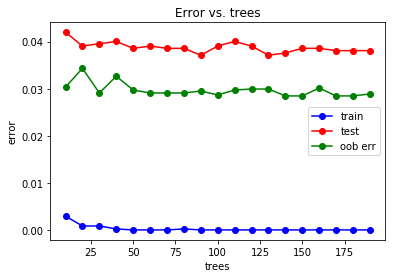

In [129]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob err')
plt.title('Error vs. trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [130]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_oob_err = np.min(oob_err)
print(min_train_err, min_test_err, min_oob_err)

0.0 0.037109375 0.028463792381749675


Оптимальное значение количества деревьев

In [131]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 90 130]


##  AdaBoost

Подберём оптимальное количество деревьев для AdaBoost.

In [134]:
trees_arr = np.arange(10,200,10)
test_err = []
train_err = []
for trees in trees_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = trees)
    ab.fit(X_train, y_train)

    y_train_pred = ab.predict(X_train)
    y_test_pred =ab.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки на обучающей и тестовой выборке от количества используемых деревьев.

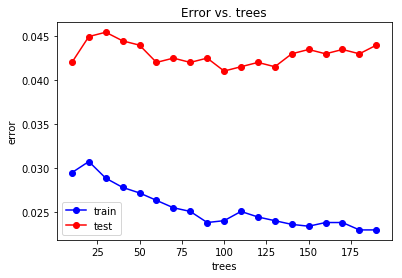

In [135]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [137]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.023022185014650483 0.041015625


Оптимальное значение количества деревьев

In [138]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[100]


##  GBT

Подберём оптимальное количество деревьев для GBT.

In [139]:
trees_arr = np.arange(10,200,10)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred =gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки на обучающей и тестовой выборке от количества используемых деревьев.

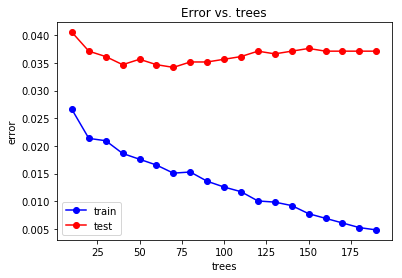

In [140]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [141]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.004813729593972373 0.0341796875


Оптимальное значение количества деревьев

In [142]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[70]


# Выводы

При количестве деревьев более 50 наблюдается переобучение и увеличение ошибки на тестовой выборке.

# Лабораторная работа №4

# PCA

### PCA и Random Forests

Подберем оптимальные значения компонент для PCA и посчитаем ошибки на обучающей и тестовой выборках.

In [149]:
from sklearn.decomposition import PCA

In [305]:
arr_components = [1,2,3,5,7,9,11,15,17,21,25]
test_err = []
train_err = []
for com in arr_components:
    pca = PCA(n_components = com)
    pca.fit(X_train)
    new_X_train = pca.transform(X_train)
    new_X_test = pca.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 40, random_state = 21)
    rf.fit(new_X_train, y_train)

    y_train_pred = rf.predict(new_X_train)
    y_test_pred = rf.predict(new_X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим графики зависимости ошибки от количества компонент:

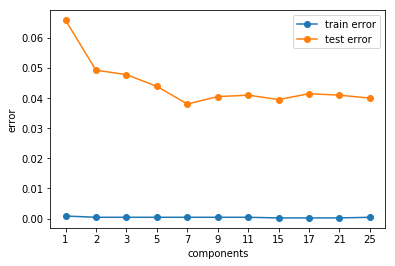

In [306]:
plt.plot(train_err, '-o', label = 'train error')
plt.plot(test_err, '-o', label = 'test error')
plt.xticks(range(len(arr_components)), arr_components)
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [307]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0002092925910422771 0.0380859375


Оптимальное число компонент:

In [308]:
index = test_err.index(min_test_err)
n_comp_opt = arr_components[index]
print(n_comp_opt)

7


### Вывод 

Ошибка на тестовой выборке повысилась, точность классификации понизилась. Использование PCA не улучшило результат. При минимально возможном количистве компонент ошибка на обучающей выборке равна нулю. Однако, с увеличением количества компонент ошибка на тестовой выборке уменьшается. Лучший результат достигается при количестве компонент равном 7.

### PCA и нейронная сеть 

Применим PCA с нейронной сетью:

In [314]:
arr_components = np.arange(1,25,2)
test_err = []
train_err = []
for com in arr_components:
    pca = PCA(n_components = com)
    pca.fit(X_train)
    
    new_X_train = pca.transform(X_train)
    new_X_test = pca.transform(X_test)
    mlp_model = MLPClassifier(alpha = 0.12742749857031335, hidden_layer_sizes = (160,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 21)
    mlp_model.fit(new_X_train, y_train)

    y_train_pred = mlp_model.predict(new_X_train)
    y_test_pred = mlp_model.predict(new_X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


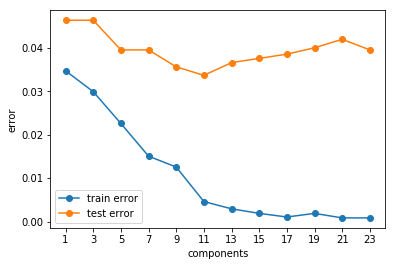

In [315]:
plt.plot(train_err, '-o', label = 'train error')
plt.plot(test_err, '-o', label = 'test error')
plt.xticks(range(len(arr_components)), arr_components)
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [316]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0008371703641691084 0.03369140625


In [317]:
index = test_err.index(min_test_err)
n_comp_opt = arr_components[index]
print(n_comp_opt)

11


### Вывод 

Ошибка на тестовой выборке почти не изменилась. Использование PCA не улучшило результат. Однако, PCA в данном случае позволяет значительно уменьшить размерность данных, не понеся потерей в точности. Лучший результат достигается при количестве компонент равном 11.

В заключении можно сказать, что лучше всех на представленных данных работают Random Forests и нейронная сеть с одним скрытым слоем. Лучшие результаты достигаются при количестве деревьев равном 40 для Random Forests и 160 нейронами и alpha=0.12742749857031335 для нейронной сети. При этом, возможно применение PCA для нейронной сети без значимой потери в точности.